In [ ]:
import pandas as pd
import seaborn as sbn
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
#from pandas import load_dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
#train = load_dataset('titanic')
%pwd
#https://neptune.ai/blog/google-colab-dealing-with-files
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


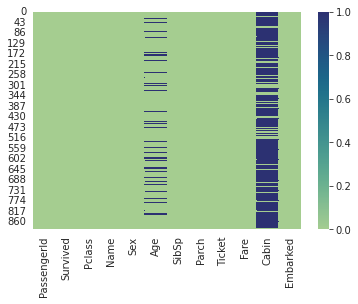

In [ ]:
sbn.heatmap(train.isnull(), cmap = 'crest')
# additional arguments ( xticklabels = False, yticklabels = False, cbar = False)

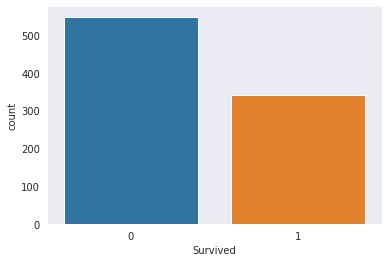

In [ ]:
sbn.set_style('dark')
sbn.countplot(x = 'Survived', data = train)

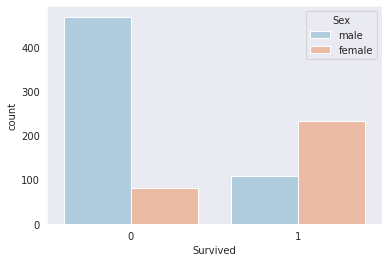

In [ ]:
sbn.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

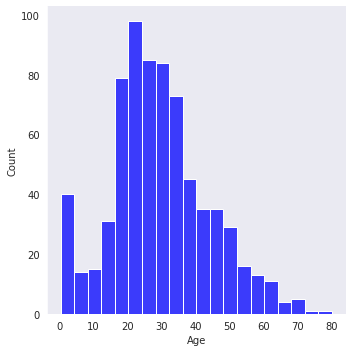

In [ ]:
sbn.displot(train['Age'].dropna(),kind = 'hist', color = 'blue', bins = 20)

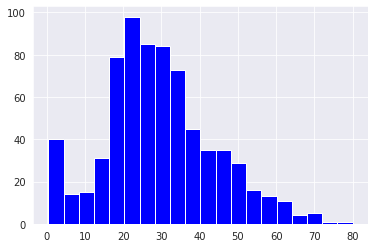

In [ ]:
train['Age'].hist(bins = 20, color = 'blue', alpha = 1)

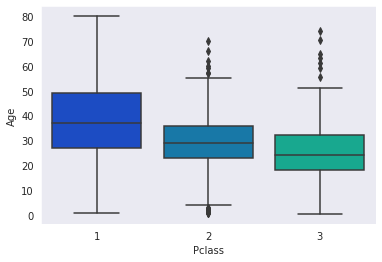

In [ ]:
sbn.boxplot(data = train, x = 'Pclass', y = 'Age', palette = 'winter')

In [ ]:
#learn how to edit columns of a dataframe http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html
row, col = train.shape
for r in range(row):
  if train['Sex'][r] == 1:
    train['Age'][r] = 38
  elif train['Pclass'][r] == 2:
    train['Age'][r] = 30
  else:
    train['Age'][r] = 25

train.head()

<ipython-input-26-986d7e060af3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 25
<ipython-input-26-986d7e060af3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 30


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,25.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,25.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,NaN,S


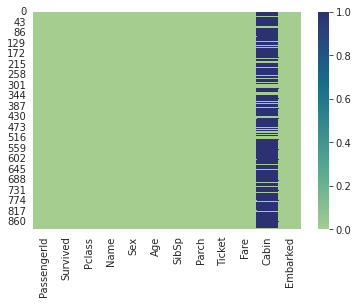

In [ ]:
sbn.heatmap(train.isnull(), cmap = 'crest')

In [ ]:
train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,25.0,1,0,7.2500,S
1,1,1,female,25.0,1,0,71.2833,C
2,1,3,female,25.0,0,0,7.9250,S
3,1,1,female,25.0,1,0,53.1000,S
4,0,3,male,25.0,0,0,8.0500,S
5,0,3,male,25.0,0,0,8.4583,Q
6,0,1,male,25.0,0,0,51.8625,S
7,0,3,male,25.0,3,1,21.0750,S
8,1,3,female,25.0,0,2,11.1333,S
9,1,2,female,30.0,1,0,30.0708,C


In [ ]:
# train.info()
# row, col = train.shape
# for r in range(row):
#   if train['Sex'][r] == 'male':
#     train['Sex'][r] = 1
#   else:
#     train['Sex'][r] = 0

# for r in range(row):
#   if str(train['Embarked'][r]) == 'S':
#     train['Embarked'][r] = 1
#   elif train['Embarked'][r] == 'Q':
#     train['Embarked'][r] = 2
#   else:
#     train['Embarked'][r] = 3

# train.head(10)

In [ ]:
embarked = pd.get_dummies(train['Embarked'])
sex = pd.get_dummies(train['Sex'])
train.drop(['Embarked', 'Sex','Parch'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Fare
0,0,3,25.0,1,7.2500
1,1,1,25.0,1,71.2833
2,1,3,25.0,0,7.9250
3,1,1,25.0,1,53.1000
4,0,3,25.0,0,8.0500


In [ ]:
train = pd.concat([train, sex, embarked], axis = 1)
train.head()

,Survived,Pclass,Age,SibSp,Fare,female,male,C,Q,S
0,0,3,25.0,1,7.2500,0,1,0,0,1
1,1,1,25.0,1,71.2833,1,0,1,0,0
2,1,3,25.0,0,7.9250,1,0,0,0,1
3,1,1,25.0,1,53.1000,1,0,0,0,1
4,0,3,25.0,0,8.0500,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.4, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000 )
logmodel.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, predictions)
print(confusion)

accuracy = (confusion[0][0] + confusion[1][1])/(confusion[0][0] + confusion[1][1] + confusion[1][0] + confusion[0][1])
precision = (confusion[0][0]/(confusion[0][0] + confusion[0][1]))
recall = (confusion[0][0]/(confusion[0][0] + confusion[1][0]))

f1 = (2*precision*recall)/(precision + recall)
print('accuracy: ',accuracy)
print('precision: ',precision )
print('recall: ',recall)
print('f1: ', f1)

[[185  22]
 [ 52  98]]
accuracy:  0.7927170868347339
precision:  0.893719806763285
recall:  0.7805907172995781
f1:  0.8333333333333334


In [ ]:
m, n = train.shape
w = np.ones(n+2)*2.0
lamb = 0.01
iterations = 1000
old_w = w
for itr in range(iterations):
  for a in range(1, n+1):
    dEdw = 0
    for i in range(m):
      z = 0
      for k in range(1, n):
        z = z + old_w[k] * train.iloc[i,k]
      z = z + old_w[n]
      dEdw += train['Survived'][i] * math.log2(math.e) * (1.0 - (1.0/(1.0+math.pow(math.e, -1.0*train['Survived'][i]*z))))
    if a < n:
      w[a] = old_w[a] + lamb*dEdw*train.iloc[i,a]/m
    else:
      w[a] = old_w[a] + lamb*dEdw/m
  old_w = w

print(w)
error = 0
for i in range(m):
  z = 0
  for j in range(1, n):
    z = z + w[j]*train.iloc[i,j]
  z = z + w[n]
  z = math.pow(math.e,-1.0*z)
  z = 1.0/(1.0+z)
  pred = -1
  if z > 0.5:
    pred = 1
  if pred != train['Survived'][i]:
    error += 1
error = error / m

print(1-error)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
0.38383838383838387


In [ ]:
#76865671641791
#test size 0.4 = 0.7955182072829131
#no parched= 0.7787114845938375
#Sex-age-0.7611940298507462